# Task 4

First, update the following cell to have a link to your Homework 1 GitHub repository:

UPDATE THIS LINK:

https://github.com/charliecurtin1/eds220-hwk-1

In this task, make at least 5 commits at moments you think are adequate. We'll look at your repo to check commit history. Err on the side of commenting too much for now to get in the habit.

Add comments for all your code. Err on the side of commenting too much for now.

Comments in each exercise and commits will count towards your grade.

This task covers topics we will see on Wednesday Oct. 11. You might want to wait until after that class to solve it.

## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is in tabular format and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it as `raw_eqk` (variable name).

c. Look at the head of the dataframe.

In [3]:
# import pandas
import pandas as pd

# import the data
raw_eqk = pd.read_csv('data/earthquake_data.csv')

# explore the data
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe.

b. Print the type of `raw_eqk`'s shape.

c. Print *only* the number of rows by accessing it from `raw_eqk`'s shape. HINT: how do you index an element in a tuple?

In [4]:
# print the shape of the dataframe
print(raw_eqk.shape)

# print the type of the shape
print(type(raw_eqk.shape))

# print the number of rows by indexing the tuple
print(raw_eqk.shape[1])

(120108, 8)
<class 'tuple'>
8


## 3

Get the unique values of the type of events.

In [5]:
# call the unique values of the type of events
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

# 4

a. Select only earthquake events and store them as `eqk` (variable name)

b. Update the index of `eqk` to be the `id` column of the dataframe. 

c. Check the new index by viewing the first 3 rows of `eqk`.

In [6]:
# A - select only earthquake events by filtering
eqk = raw_eqk[raw_eqk['type'] == 'earthquake']

# B - update the index of eqk to be the id column, rename variable so it's stored
eqk = eqk.set_index('id')

# C - check the new index
eqk.head(3)

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,"12km NNW of North Nenana, Alaska",earthquake


# 5

How many events were left out of `raw_eqk` when you selected ony earthqake events? 

HINT: There are *many* ways you can get this information. One could be to use (2).

In [7]:
# name the shape tuples as new variables
tup1 = raw_eqk.shape

tup2 = eqk.shape

# subtract the tuples using indexing
print(tup1[0] - tup2[0])

# alternatively - using filtering. Filter for every event that's not an earthquake. Index for the rows in the shape tuple
raw_eqk[raw_eqk['type'] != 'earthquake'].shape[0]

1710


1710

# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

<AxesSubplot:title={'center':'Frequency of earthquake magnitudes since 2014'}, ylabel='Frequency'>

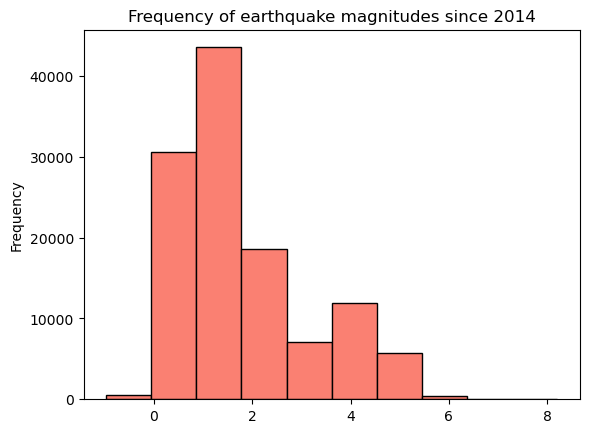

In [8]:
# plot a histogram of the earthquake's magnitudes
eqk['mag'].plot(kind = 'hist', # initializes plot and tells it to plot a histogram
               color = 'salmon', # changes the color of the plotted data
               edgecolor = 'black', # adds an edgecolor to the bins
               title = 'Frequency of earthquake magnitudes since 2014') # adds a title

# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

<AxesSubplot:title={'center':'Top 20 Earthquake Magnitudes since 2014'}, xlabel='earthquake ID', ylabel='magnitude'>

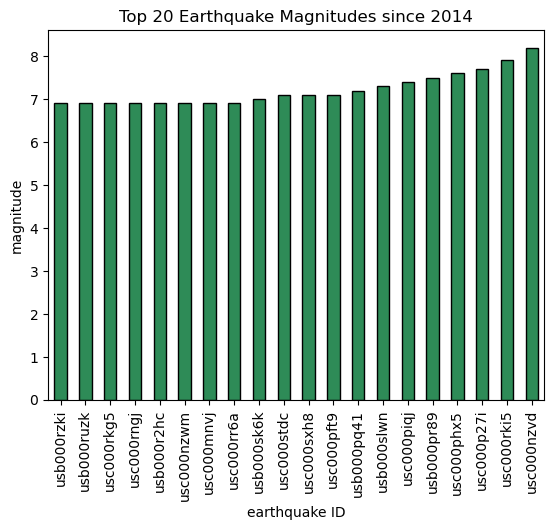

In [9]:
# A - find the top 20 earthquakes with largest magnitude
top20 = eqk.mag.nlargest(20).sort_values()

# B - create a bar plot showing the magnitude of the top 20 earthquakes
top20.plot(kind = 'bar', # initializes plot and sets it as a bar plot
          color = 'seagreen', # changes bar colors
          xlabel = 'earthquake ID', # updates x-axis label
          ylabel = 'magnitude', # updates y-axis labels
          title = 'Top 20 Earthquake Magnitudes since 2014', # adds a title
          edgecolor = 'black') # updates bar edgecolor

- Setting the index to ID means we can associate our top 20 highest magnitude earthquakes to specific events. If we hadn't set the index, our x-axis would show the default index of row position, meaning we wouldn't know exactly which events the graph is referring to. 

# 8 
We are interested in place, magnitude and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame.

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [10]:
# select the place, magnitude, and depth of the top 20 earthquakes with the largest magnitude using the index of top20
eqk.loc[ top20.index, ['place', 'mag', 'depth'] ]

,place,mag,depth
id,,,
usb000rzki,Federated States of Micronesia region,6.9,13.00
usb000ruzk,"99km NNE of Ndoi Island, Fiji",6.9,615.42
usc000rkg5,"80km SSE of Raoul Island, New Zealand",6.9,20.00
usc000rngj,"154km NNW of Visokoi Island,",6.9,8.00
usb000r2hc,"22km SSW of Kamariotissa, Greece",6.9,6.43
usc000nzwm,"91km WNW of Iquique, Chile",6.9,28.42
usc000mnvj,"272km ESE of Hotan, China",6.9,10.00
usc000rr6a,"4km W of Puerto Madero, Mexico",6.9,53.00
usb000sk6k,Southern East Pacific Rise,7.0,16.54


# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greter than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


<AxesSubplot:title={'center':'Location of earthquakes with magnitude greater than 5'}, xlabel='longitude', ylabel='latitude'>

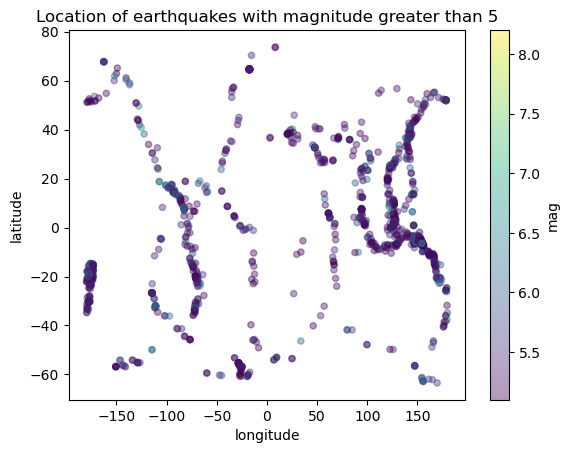

In [16]:
# visualize the location of earthquakes with magnitude greater than 5
eqk[eqk['mag']>5].plot( # filter for earthquakes with magnitude greater than 5 and intialize the plot
    kind = 'scatter', # specify a scatter plot
    x = 'longitude', # specify what to plot on the x-axis
    y = 'latitude', # specify what to plot on the y-axis
    c = 'mag', # specify to map the color aesthetic based on magnitude
    colormap = 'viridis', # set the colormap to viridis
    alpha = .4, # change the transparency of points to see overlaps more easily
    title = "Location of earthquakes with magnitude greater than 5") # add a graph title